In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

data = pd.read_excel("DataBersih1.xlsx")

In [75]:
print(data.head())

                  Date  Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg
0  2001-01-01 00:00:00  23  32.4  25.9      86  85.5  2.5     4    290       2
1  2001-01-02 00:00:00  24  33.8  27.1      82   4.0  6.6     4    340       2
2  2001-01-03 00:00:00  23  34.5  27.2      82  26.3  6.0     4    350       2
3  2001-01-04 00:00:00  23  27.8  24.3      96  24.9  0.0     3    360       2
4  2001-01-05 00:00:00  24  33.3  27.6      81   8.2  6.0     5    260       2


In [76]:
print(data.isnull().sum())

Date      0
Tn        0
Tx        0
Tavg      0
RH_avg    0
RR        0
ss        0
ff_x      0
ddd_x     0
ff_avg    0
dtype: int64


In [77]:
data = data.dropna()

In [78]:
print(data.describe())

                Tn           Tx         Tavg       RH_avg           RR  \
count  2206.000000  2206.000000  2206.000000  2206.000000  2206.000000   
mean     23.273345    31.519674    26.451088    85.509973    14.974660   
std       1.093409     2.085643     1.307497     6.846396    25.670615   
min      18.000000    24.800000    22.200000    38.000000     0.000000   
25%      23.000000    30.200000    25.600000    82.000000     0.000000   
50%      23.000000    31.800000    26.500000    86.000000     4.000000   
75%      24.000000    33.000000    27.300000    90.000000    18.100000   
max      26.000000    36.200000    30.600000   100.000000   253.800000   

                ss         ff_x        ddd_x       ff_avg  
count  2206.000000  2206.000000  2206.000000  2206.000000  
mean      3.737217     5.429284   190.425657     2.998187  
std       2.656024     2.731231   103.233626     0.804746  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.300000     4.000000  

In [79]:
column_mapping = {
    "Tn": "Temperatur minimum (°C)",
    "Tx": "Temperatur maksimum (°C)",
    "Tavg": "Temperatur rata-rata (°C)",
    "RH_avg": "Kelembapan rata-rata (%)",
    "ss": "Lama penyinaran matahari (jam)",
    "ff_x": "Kecepatan angin maksimum (m/s)",
    "ff_avg": "Kecepatan angin rata-rata (m/s)",
}

data.rename(columns=column_mapping)

,Date,Temperatur minimum (°C),Temperatur maksimum (°C),Temperatur rata-rata (°C),Kelembapan rata-rata (%),RR,Lama penyinaran matahari (jam),Kecepatan angin maksimum (m/s),ddd_x,Kecepatan angin rata-rata (m/s)
0,2001-01-01 00:00:00,23,32.4,25.9,86,85.5,2.5,4,290,2
1,2001-01-02 00:00:00,24,33.8,27.1,82,4.0,6.6,4,340,2
2,2001-01-03 00:00:00,23,34.5,27.2,82,26.3,6.0,4,350,2
3,2001-01-04 00:00:00,23,27.8,24.3,96,24.9,0.0,3,360,2
4,2001-01-05 00:00:00,24,33.3,27.6,81,8.2,6.0,5,260,2
...,...,...,...,...,...,...,...,...,...,...
2201,2009-12-27 00:00:00,24,33.5,26.7,90,6.4,5.1,4,90,3
2202,2009-12-28 00:00:00,22,31.8,25.7,92,71.6,4.5,6,270,5
2203,2009-12-29 00:00:00,23,34.3,27.4,86,2.0,8.0,5,90,4
2204,2009-12-30 00:00:00,24,32.4,27.5,84,2.2,2.0,2,110,2


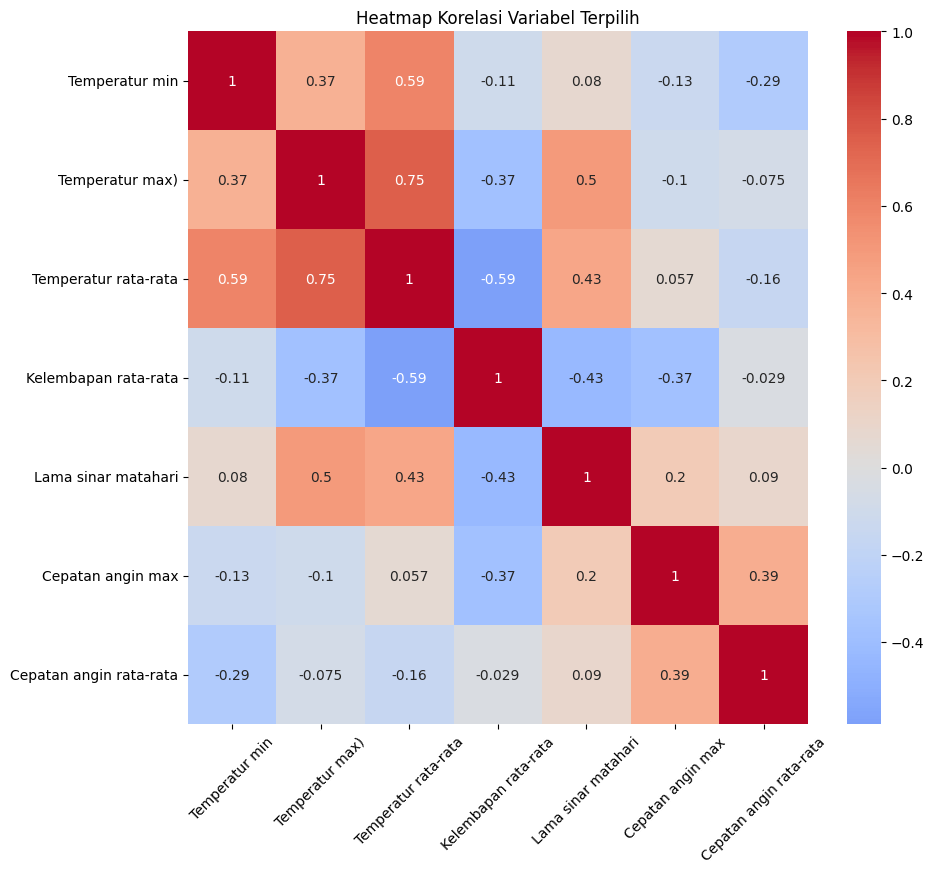

In [80]:
variables = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ff_avg']
data_selected = data[variables]
data_selected = data_selected.rename(columns={
    "Tn": "Temperatur min",
    "Tx": "Temperatur max)",
    "Tavg": "Temperatur rata-rata",
    "RH_avg": "Kelembapan rata-rata",
    "ss": "Lama sinar matahari",
    "ff_x": "Cepatan angin max",
    "ff_avg": "Cepatan angin rata-rata"
})
corr_matrix = data_selected.corr()
plt.figure(figsize=(10, 9))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.title('Heatmap Korelasi Variabel Terpilih')
plt.show()

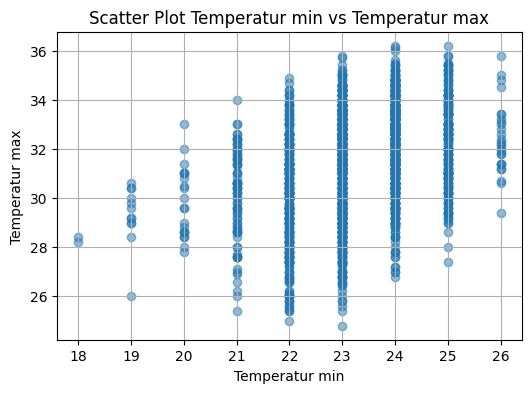

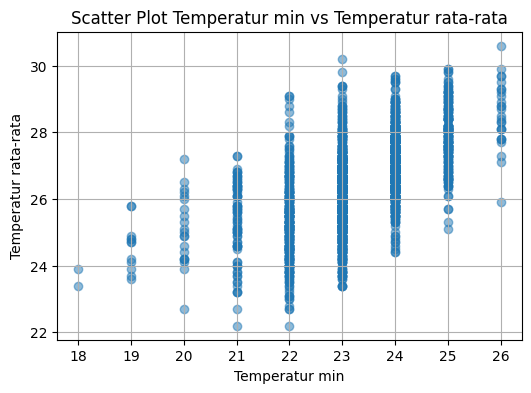

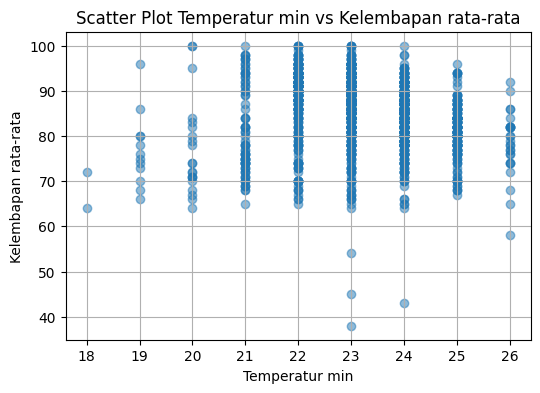

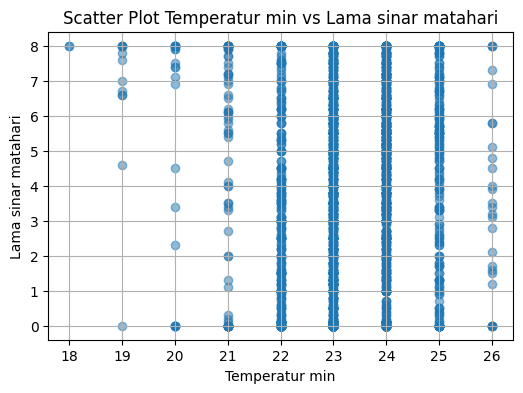

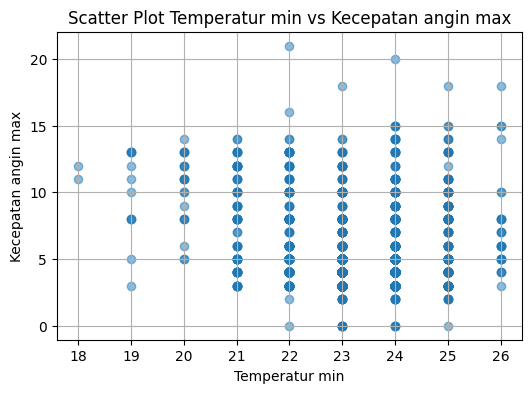

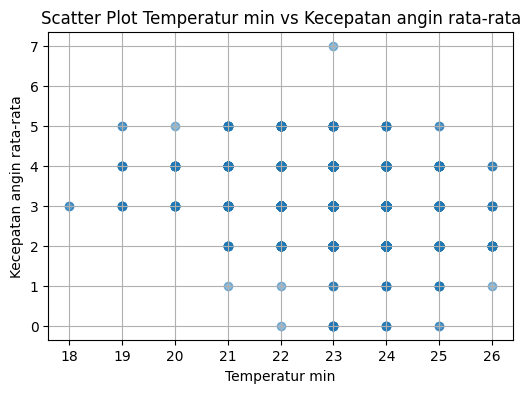

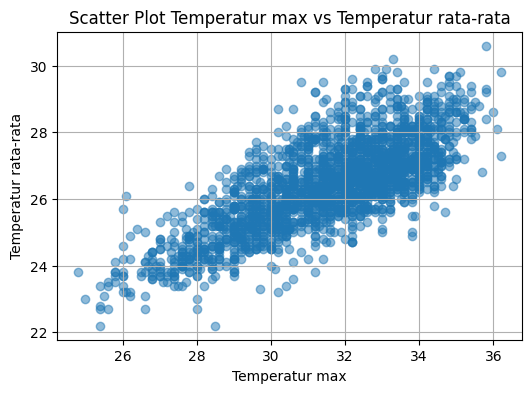

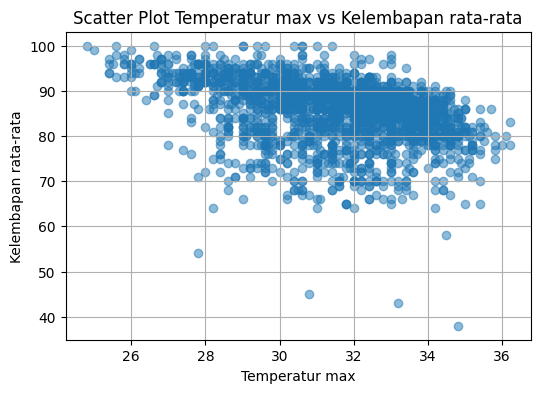

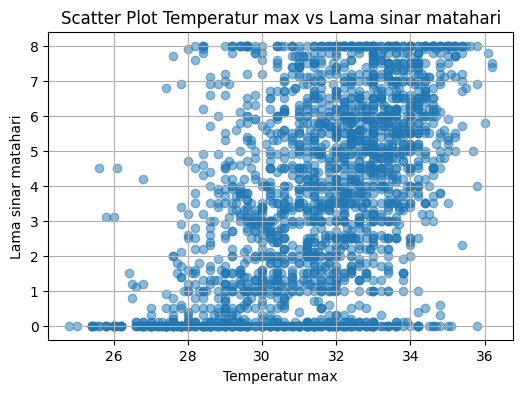

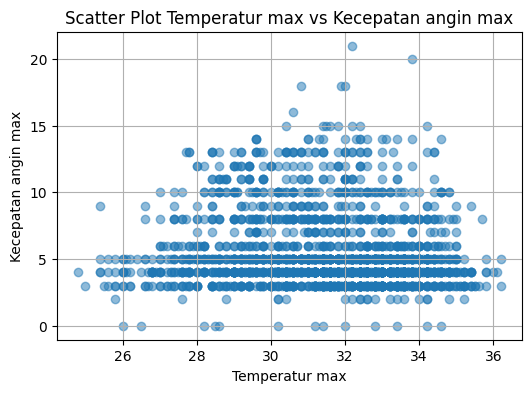

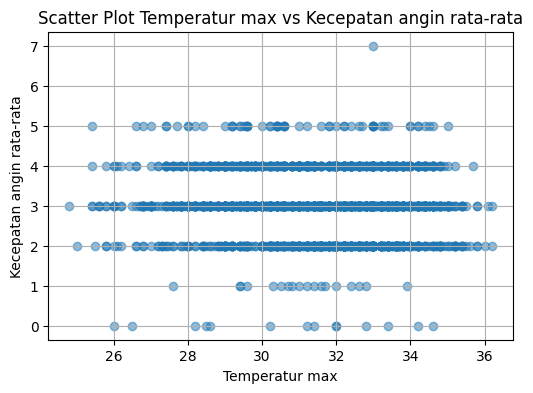

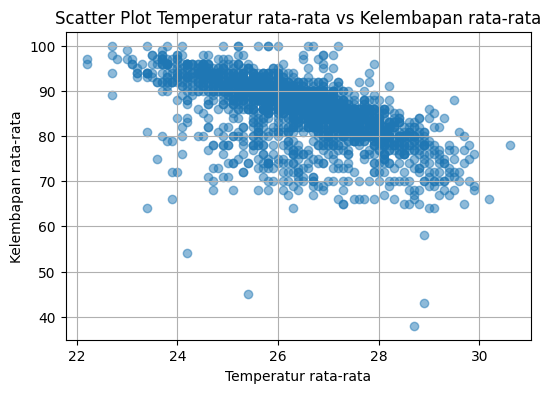

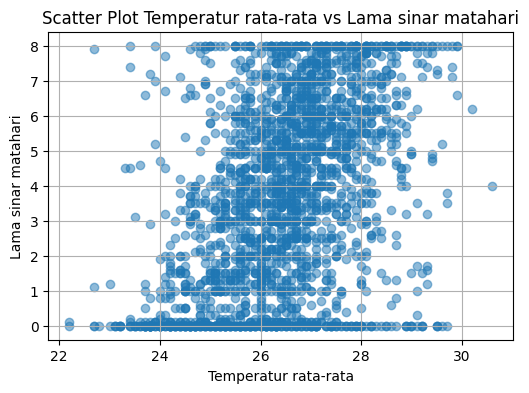

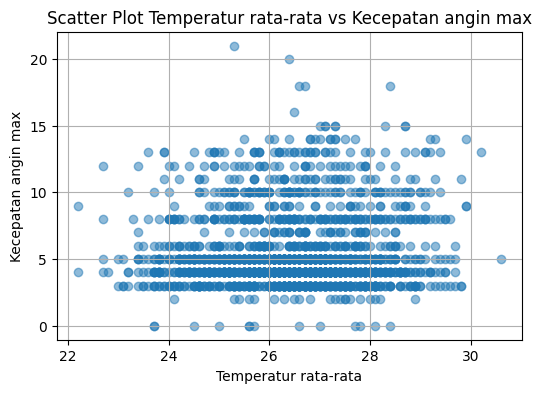

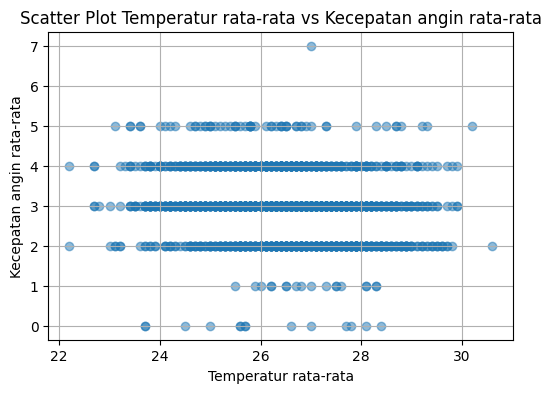

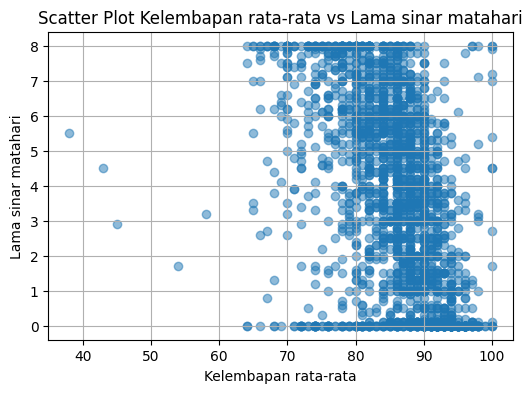

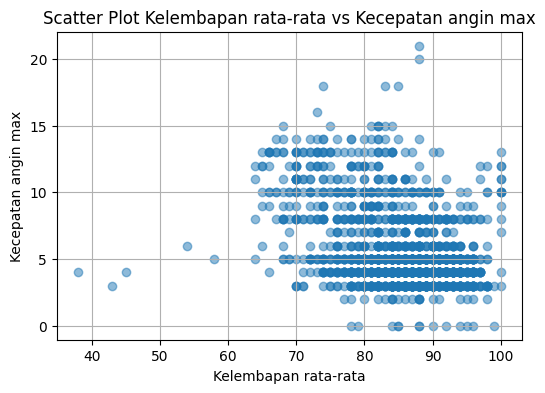

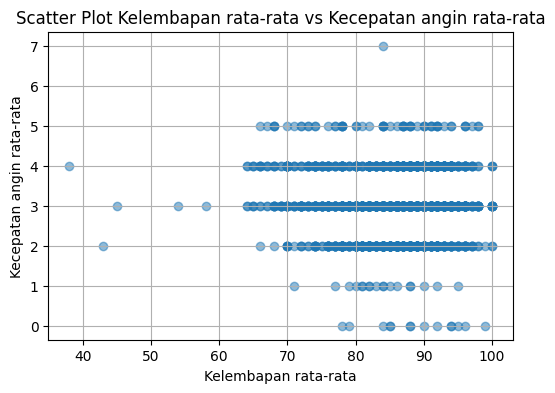

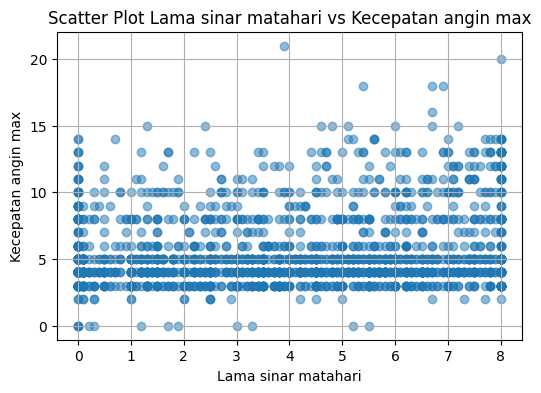

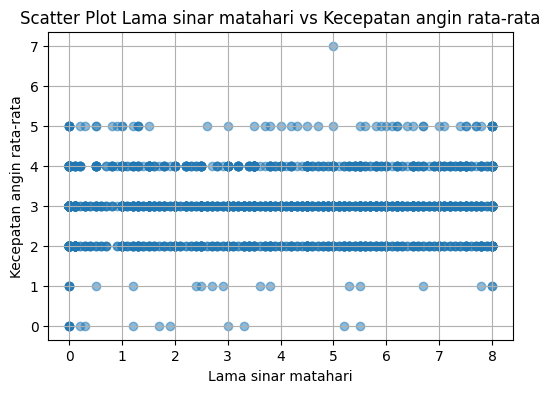

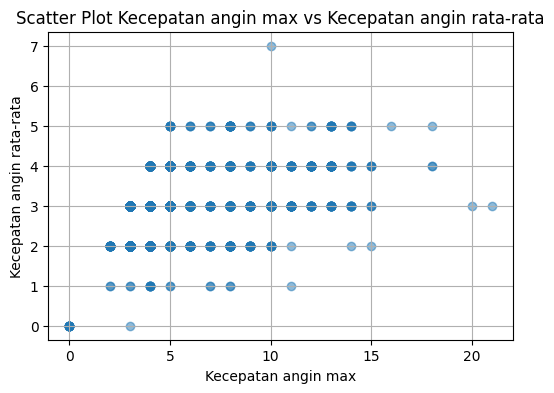

In [81]:
variables = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ff_avg']


data_selected = data[variables]


data_selected = data_selected.rename(columns={
    "Tn": "Temperatur min",
    "Tx": "Temperatur max",
    "Tavg": "Temperatur rata-rata",
    "RH_avg": "Kelembapan rata-rata",
    "ss": "Lama sinar matahari",
    "ff_x": "Kecepatan angin max",
    "ff_avg": "Kecepatan angin rata-rata"
})

def scatter_plot(df, var1, var2):
    plt.figure(figsize=(6, 4))
    plt.scatter(df[var1], df[var2], alpha=0.5)
    plt.title(f'Scatter Plot {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()
renamed_variables = data_selected.columns
for i in range(len(renamed_variables)):
    for j in range(i+1, len(renamed_variables)):
        scatter_plot(data_selected, renamed_variables[i], renamed_variables[j])